# Markowitz Optimization and the Efficient Frontier

## Portfolios as Assets

Just by introducing this third asset. I have expanded dramatically the space of portfolios that I can build. If I have just three assets, I in fact no longer have just a curve that represents all possible portfolios, I have an entire region of portfolios

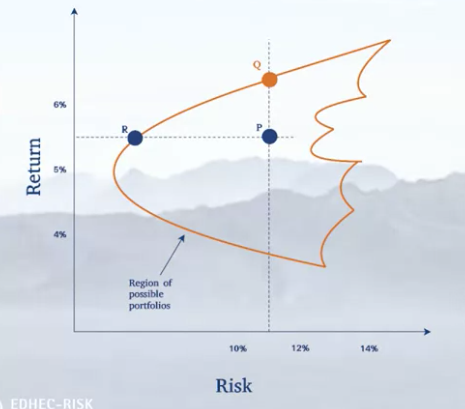

You would never hold any portfolio in the interior of that region. Why? Because there's always at least two portfolios that are better. One is the one straight above you, going straight up, which is going to give you a higher return for the same level of volatility, or you can just go left. When you go to the extreme left, you're going to hit the edge of that region, and at that point you've found your portfolio that has the same level of return, but you cannot decrease the volatility anymore

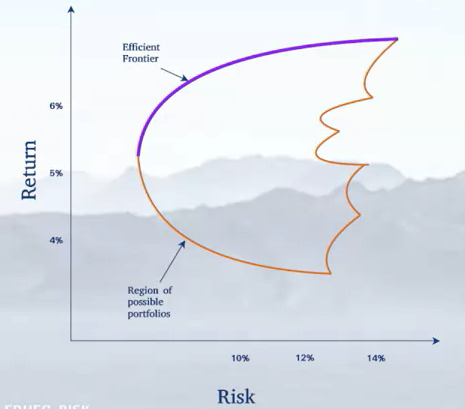

It turns out that in practice, this is a lot harder to do than you might think, and there are significant problems that you face while trying to identify portfolios on the efficient frontier.
 
> mean-variants investor: is someone who's looking at a portfolio's solution problem like this, which is "Hey all I care about is returns and volatility." 

## Lab - Efficient Frontier - Part 2

In [41]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [8]:
l = ['Food', 'Beer', 'Smoke', 'Coal']
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [10]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [6]:
# Portfolio correspond simply to an allocation of capital
# The weights correspond to the allocation
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [9]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [11]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055059195776437045

### 2. Asset Frontier

In [23]:
l = ['Games', 'Fin']
n_points = 20

In [27]:
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [28]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [29]:
len(weights)

20

In [30]:
l

['Games', 'Fin']

In [33]:
# So these are the points that define the efficient frontier
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]

# Package them as a dataframe
ef = pd.DataFrame({"R": rets, "Vol": vols})

<AxesSubplot:xlabel='Vol', ylabel='R'>

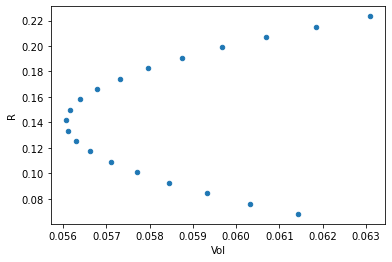

In [34]:
ef.plot.scatter(x="Vol", y="R")

<AxesSubplot:xlabel='Volatility'>

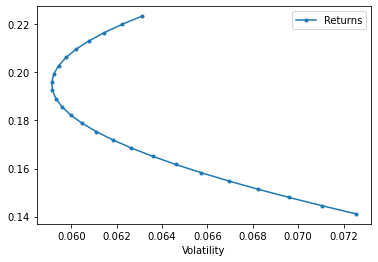

In [39]:
l = ['Fin', 'Beer']
erk.plot_ef2(25, er[l], cov.loc[l,l])

<AxesSubplot:xlabel='Volatility'>

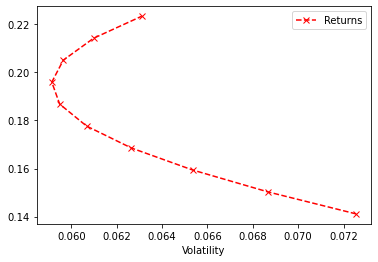

In [45]:
erk.plot_ef2(10, er[l], cov.loc[l,l], style='r--x')

In [47]:
cov.loc[l,l]

,Fin,Beer
Fin,0.003982,0.002571
Beer,0.002571,0.005264


In [48]:
er[l]

Fin     0.223371
Beer    0.141126
dtype: float64